In [33]:
# Imports

import pandas as pd


from matplotlib.image import imread 
from PIL import Image, ImageFile

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array

import os
import glob
from tqdm import tqdm
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
train_neg_filepath = 'chest_xray/train/NORMAL/'
train_pos_filepath = 'chest_xray/train/PNEUMONIA/'
test_neg_filepath = 'chest_xray/test/NORMAL/'
test_pos_filepath = 'chest_xray/test/PNEUMONIA/'

In [39]:
files_train_neg = glob.glob(os.path.join(train_neg_filepath,"*.jpeg"))
files_train_pos = glob.glob(os.path.join(train_pos_filepath,"*.jpeg"))
files_test_neg = glob.glob(os.path.join(test_neg_filepath,"*.jpeg"))
files_test_pos = glob.glob(os.path.join(test_pos_filepath,"*.jpeg"))

In [60]:
def img_to_array_list(filepath):
    arr_list = []
    for img in tqdm(filepath):
        pic = Image.open(img)
        pic.load()
        arr_list.append(np.asarray(pic))
    return arr_list

In [63]:
train_neg = img_to_array_list(files_train_neg)
train_pos = img_to_array_list(files_train_pos)
test_neg = img_to_array_list(files_test_neg)
test_pos = img_to_array_list(files_test_pos)

100%|██████████| 390/390 [00:03<00:00, 123.42it/s]


In [34]:
# Testing
train_neg_img_lst = []
for img in tqdm(files_train_neg):
    normal = Image.open(img)
    normal.load()
    train_neg_img_lst.append(np.asarray(normal))

100%|██████████| 1349/1349 [00:34<00:00, 38.62it/s]


In [64]:
# Testing
train_pos_img_lst = []
for img in tqdm(files_train_pos):
    pic = Image.open(img)
    pic.load()
    train_pos_img_lst.append(np.asarray(pic))

100%|██████████| 3883/3883 [00:28<00:00, 137.40it/s]


[[71 75 69 ... 38 37 39]
 [74 74 69 ... 38 36 37]
 [74 75 67 ... 38 36 35]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


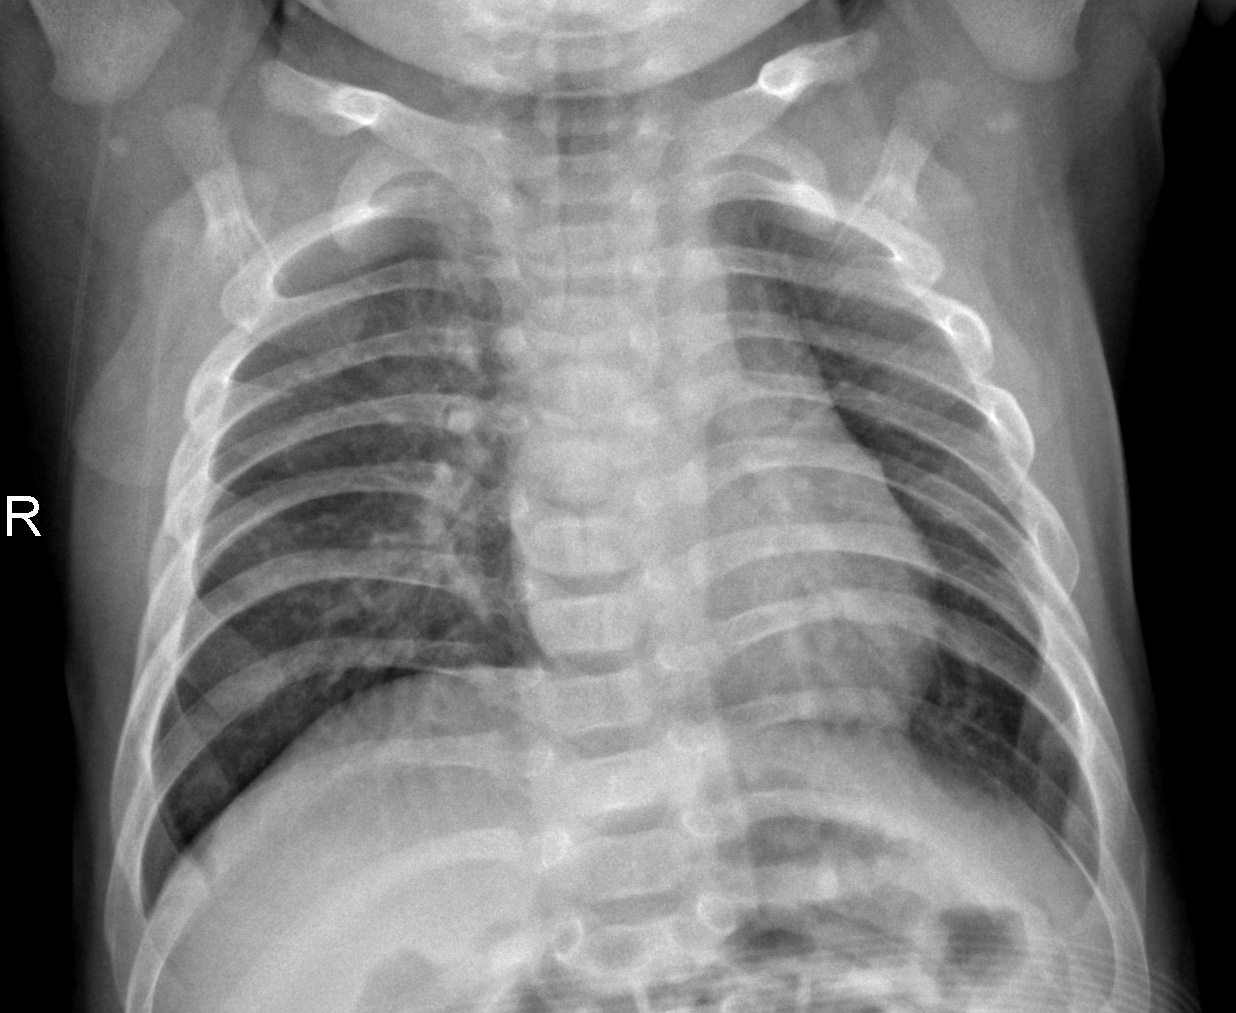

In [15]:
success = Image.open('chest_xray/train/NORMAL/NORMAL-1014768-0001.jpeg')
success.load()

print(np.asarray(success))
#success

In [65]:
train_path = 'chest_xray/train/'
img_dgen = Ima